In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# results = pd.read_excel("/Users/kevin/Downloads/a60d44123be34312b35938d079fa5c5f.xlsx")
train = pd.read_excel("/home/kkotzen/tmp/results/3033413d73a44ff686492240f8a47cde.xlsx")
train['sex']= train['sex'].map({0:'Female', 1:'Male'})
train['hypertension']= train['hypertension'].map({0:'No', 1:'Yes'})
train['Labels_transitions'] = np.sum(train[[l for l in train.columns if 'Labels' in l]].values, axis=1)

validate = pd.read_excel("/home/kkotzen/tmp/results/19432cc1b59b434e808d1c01e206d3df.xlsx")
validate['sex']= validate['sex'].map({0:'Female', 1:'Male'})
validate['hypertension']= validate['hypertension'].map({0:'No', 1:'Yes'})
validate['Labels_transitions'] = np.sum(validate[[l for l in validate.columns if 'Labels' in l]].values, axis=1)

test = pd.read_excel("/home/kkotzen/tmp/results/a9c7402a81784254a4abd801f8e9c389.xlsx")
# test['sex']= test['sex'].map({0:'Female', 1:'Male'})
# test['hypertension']= test['hypertension'].map({0:'No', 1:'Yes'})
test['Labels_transitions'] = np.sum(test[[l for l in test.columns if 'Labels' in l]].values, axis=1)

metadata = pd.read_csv("/home/kkotzen/databases/mesa/datasets/mesa-sleep-dataset-0.3.0.csv")
for index, row in train.iterrows():
    train.loc[index, 'insomnia'] = metadata[metadata.id == int(row.id)].whiirs5c.values[0] 
    
for index, row in validate.iterrows():
    validate.loc[index, 'insomnia'] = metadata[metadata.id == int(row.id)].whiirs5c.values[0] 
    
for index, row in test.iterrows():
    test.loc[index, 'insomnia'] = metadata[metadata.id == int(row.id)].whiirs5c.values[0] 

In [10]:
train = train[~train['insomnia'].isna()]
validate = validate[~validate['insomnia'].isna()]
test = test[~test['insomnia'].isna()]


In [5]:
# test.sort_values(by='Kappa:').head(10)
low = test[test["Kappa:"]<0.5]
high = test[test["Kappa:"]>0.7]
df = pd.DataFrame()
for col in low.columns:
    df = df.append({'Item':col, 'Low': low[col].mean(), 'High':high[col].mean()}, ignore_index=True)
df['Delta'] = (abs(df.High-df.Low)/max(df.High-df.Low))*100
df.sort_values(by="Delta")

,Item,Low,High,Delta
30,Labels-REM>Deep,0.000000,0.000000,0.000000
10,Label-Deep%,0.056400,0.050986,0.002007
15,sex,0.500000,0.487805,0.004522
9,Predicted-Light%,0.455920,0.440511,0.005714
11,Predicted-Deep%,0.023076,0.042194,0.007089
27,Labels-Deep>REM,0.107143,0.085366,0.008075
13,Predicted-REM%,0.075562,0.109902,0.012732
20,Labels-Wake>Deep,0.035714,0.000000,0.013242
7,Predicted-Wake%,0.445441,0.407394,0.014107
12,Label-REM%,0.070836,0.112615,0.015491


In [ ]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

highest = results.sort_values(by='Kappa:', ascending=False).head(10)
lowest = results.sort_values(by='Kappa:', ascending=True).head(10)
middle= results.sort_values(by='Kappa:', ascending=True).iloc[90:100]
display_side_by_side(highest[['Kappa:', 'id']], middle[['Kappa:', 'id']], lowest[['Kappa:', 'id']], titles=['Highest 10', 'Middle 10', 'Lowest 10'])

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))
results['Kappa:'].hist(bins=20, ax=ax)
ax.set_ylabel('Number of Nights')
ax.set_xlabel("Kappa")
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))
validate['Kappa:'].hist(bins=20, ax=ax)
ax.set_ylabel('Number of Nights')
ax.set_xlabel("Kappa")
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results['Kappa:'].hist(bins=20, ax=ax, density=True, alpha=0.65)
results['Kappa:'].plot(kind = "kde")
ax.set_xlabel("Kappa")
ax.set_yticks([])
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 1)

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = results['Kappa:'].quantile(0.05), results['Kappa:'].quantile(0.25), results['Kappa:'].quantile(0.5), results['Kappa:'].quantile(0.75), results['Kappa:'].quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 1, 0.9], [quant_25,1, 0.9], [quant_50, 1, 0.9],  [quant_75, 1, 0.9], [quant_95, 1, 0.9]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='black')
    ax.text(i[0]+0.0025, 0.1, np.around(i[0], 2), size = 8, rotation=30)

ax.text(quant_5-0.025,  4, "5th", size = 10, rotation=60)
ax.text(quant_25-0.025, 4, "25th", size = 10, rotation=60)
ax.text(quant_50-0.025, 4, "50th", size = 10, rotation=60)
ax.text(quant_75-0.025,4, "75th", size = 10, rotation=60)
ax.text(quant_95-0.025, 4, "95th", size = 10, rotation=60)

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'sex']].boxplot(by='sex', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Gender")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("")
results[['Kappa:', 'sex']].groupby(by='sex').describe()

In [ ]:
age_groups = [50,60,70,80,90]
for i in range(len(age_groups)-1):
    results.loc[(results.age >=age_groups[i])&(results.age < age_groups[i+1]),'age_group'] = f'{age_groups[i]}-{age_groups[i+1]-1}'
    
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'age_group']].boxplot(by='age_group', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Age")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("") 
results[['Kappa:', 'age_group']].groupby(by='age_group').describe()

In [ ]:
ahi_groups = [0,20,40,60, 80]
for i in range(len(ahi_groups)-1):
    results.loc[(results.ahi >=ahi_groups[i])&(results.ahi < ahi_groups[i+1]),'ahi_group'] = f'{ahi_groups[i]}-{ahi_groups[i+1]-1}'
    
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'ahi_group']].boxplot(by='ahi_group', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("AHI")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("") 
results[['Kappa:', 'ahi_group']].groupby(by='ahi_group').describe()

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'hypertension']].boxplot(by='hypertension', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Hypertension")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("")
results[['Kappa:', 'hypertension']].groupby(by='hypertension').describe()

In [ ]:
insomnia_groups = [0,5,9,13,17,20]
for i in range(len(insomnia_groups)-1):
    results.loc[(results.insomnia >=insomnia_groups[i])&(results.insomnia < insomnia_groups[i+1]),'insomnia_group'] = f'{str(insomnia_groups[i]).zfill(2)}-{str(insomnia_groups[i+1]-1).zfill(2)}'
validate = results
fig, ax = plt.subplots(figsize=(6,4))
results[['Kappa:', 'insomnia_group']].boxplot(by='insomnia_group', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("")
ax.set_xlabel("Insomnia Score")
ax.set_ylabel("Kappa")
ax.grid(False)
fig.suptitle("") 
results[['Kappa:', 'insomnia_group']].groupby(by='insomnia_group').describe()

In [ ]:
"""
Metrics
'WeightedF1','Accuracy:','Kappa:','MacroF1'

Labels
'age','sex','ahi','ai','hypertension','age_group','ahi_group','Label-Wake%','Label-Light%','Label-Deep%','Label-REM%','Labels-Wake>Light','Labels-Wake>Deep','Labels-Wake>REM','Labels-Light>Wake','Labels-Light>Deep','Labels-Light>REM','Labels-Deep>Wake','Labels-Deep>Light','Labels-Deep>REM','Labels-REM>Wake','Labels-REM>Light','Labels-REM>Deep','Labels-Longest_Wake','Labels-Longest_Light','Labels-Longest_Deep','Labels-Longest_REM'

Predictions
'Predicted-Wake%','Predicted-Light%','Predicted-Deep%','Predicted-REM%','Predicted-Wake>Light','Predicted-Wake>Deep','Predicted-Wake>REM','Predicted-Light>Wake','Predicted-Light>Deep','Predicted-Light>REM','Predicted-Deep>Wake','Predicted-Deep>Light','Predicted-Deep>REM','Predicted-REM>Wake','Predicted-REM>Light','Predicted-REM>Deep','Predicted-Longest_Wake','Predicted-Longest_Light','Predicted-Longest_Deep','Predicted-Longest_REM'
"""

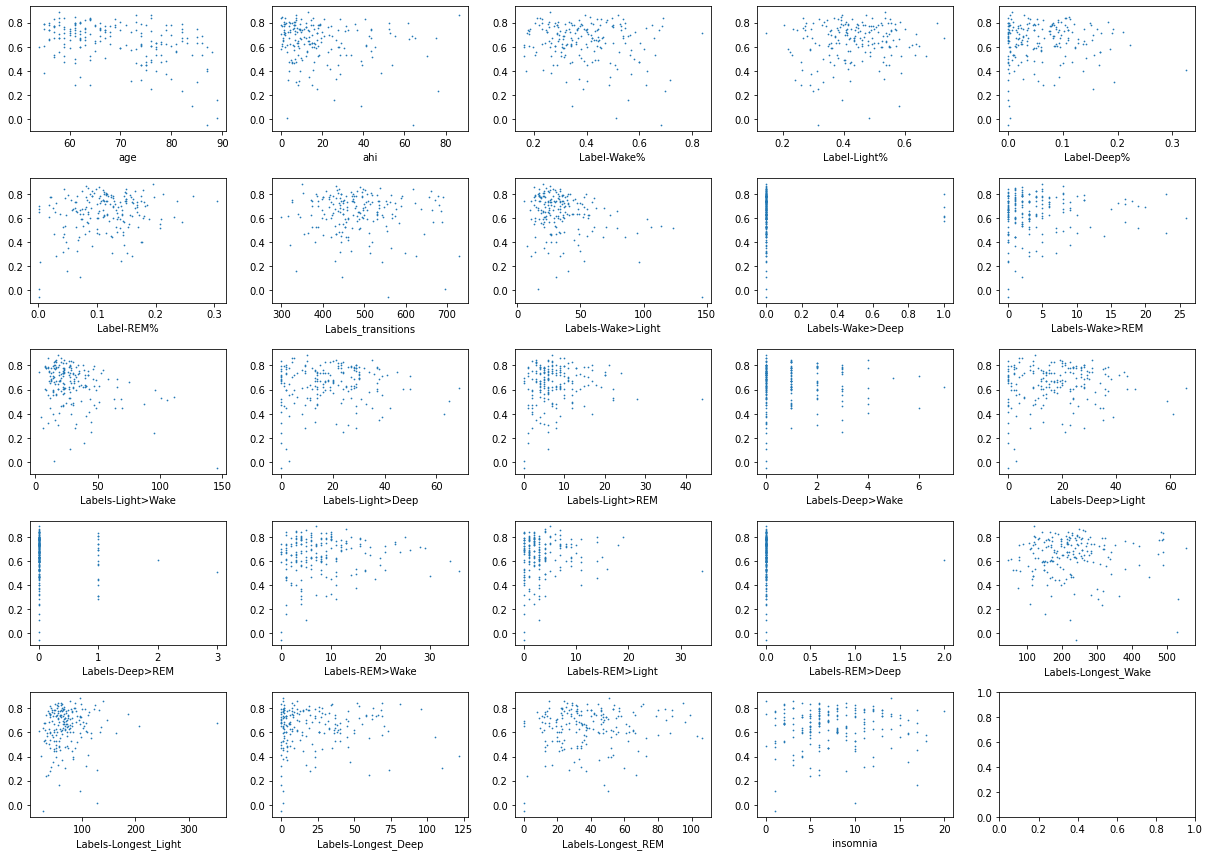

In [6]:
from pandas.plotting import scatter_matrix
ys = ["Kappa:"]
xs = ['age','ahi','Label-Wake%','Label-Light%','Label-Deep%','Label-REM%','Labels_transitions', 'Labels-Wake>Light','Labels-Wake>Deep','Labels-Wake>REM','Labels-Light>Wake','Labels-Light>Deep','Labels-Light>REM','Labels-Deep>Wake','Labels-Deep>Light','Labels-Deep>REM','Labels-REM>Wake','Labels-REM>Light','Labels-REM>Deep','Labels-Longest_Wake','Labels-Longest_Light','Labels-Longest_Deep','Labels-Longest_REM', 'insomnia']
fig, axs = plt.subplots(5, 5, figsize=(17,12))

for i in range(5): 
    for j in range (5):
        if i*5+j>=len(xs):
            continue
        axs[i][j].scatter(validate[xs[i*5+j]], validate[ys], s=0.5)
        axs[i][j].set_xlabel(xs[i*5+j])
plt.tight_layout()

In [74]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_train, y_train = train[xs].values, train[ys].values.ravel()
X_train, X_train_, y_train, y_train_ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# m = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train-m)/std
# X_test_ = (X_test_-m)/std

# X_train, y_train = np.append(X_train, X_train[y_train < 0.5].tolist()*10, axis=0), np.append(y_train, y_train[y_train < 0.5].tolist()*10, axis=0)
# X_train, y_train = train[xs].values, (train[ys].values.ravel() > 0.55).astype(int)
# X_validate, y_validate = validate[xs].values, (validate[ys].values.ravel() > 0.55).astype(int)
# X_test, y_test = test[xs].values, (test[ys].values.ravel() > 0.55).astype(int)
X_train, y_train = train[xs].values, train[ys].values.ravel()
X_validate, y_validate = validate[xs].values, validate[ys].values.ravel()
X_test, y_test = test[xs].values, test[ys].values.ravel()

regressor = RandomForestRegressor(n_estimators = 100, random_state = 10, max_depth=20)#, class_weight='balanced_subsample')
regressor.fit(X_train, y_train)  
print('Train:', regressor.score(X_train, y_train))
print('Train_:', regressor.score(X_train_, y_train_))
print('Validate:', regressor.score(X_validate, y_validate))
print('Test:', regressor.score(X_test, y_test))
preds = regressor.predict(X_test)
from sklearn.metrics import classification_report
# print(classification_report(y_test, preds))

Train: 0.8972827220243208
Train_: 0.8941866538540976
Validate: -0.25135593046180604
Test: -0.1647564896344631


Text(0, 0.5, 'Predicted Kappa')

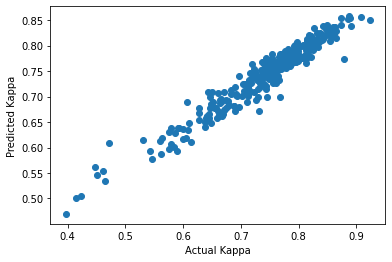

In [75]:
preds = regressor.predict(X_train_) 
plt.scatter(y_train_, preds)
plt.xlabel('Actual Kappa')
plt.ylabel('Predicted Kappa')

<AxesSubplot:xlabel='Feature'>

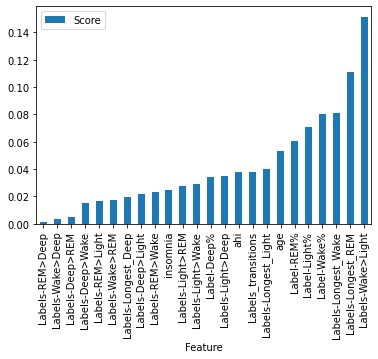

In [76]:
importance = regressor.feature_importances_
dff = pd.DataFrame()
for i,v in enumerate(importance):
    dff = dff.append({'Feature': xs[i], 'Score': v}, ignore_index=True)

dff = dff.sort_values(by='Score')
dff.plot.bar(x = 'Feature', y='Score')

<AxesSubplot:xlabel='Feature'>

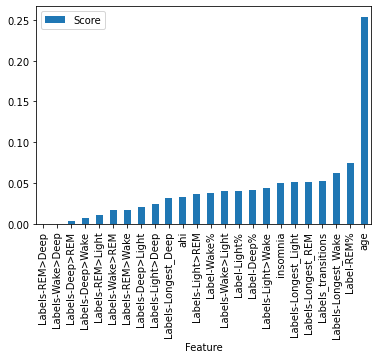

In [62]:

# plt.bar(xs, importance)
# plt.xticks(rotation='vertical')
# plt.show() 

In [ ]:
importance = regressor.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {xs[i]}, Score: {v}')
plt.bar(xs, importance)
plt.xticks(rotation='vertical')
plt.show() 

In [ ]:
a = [0,1,2,3]
print(a[0:1])

In [ ]:
a = pd.DataFrame()
a = a.append({'id':10, 'age':55, 'Kappa': 0.98888, 'id2':10, 'age2':55, 'Kappa2': 0.98888,'id3':10, 'age3':55, 'Kappa3': 0.98888,'id4':10, 'age4':55, 'Kappa4': 0.98888, 'id5':10, 'age5':55, 'Kappa5': 0.98888, 'id6':10, 'age6':55, 'Kappa6': 0.98888,'id7':10, 'age7':55, 'Kappa7': 0.98888,'id8':10, 'age8':55, 'Kappa8': 0.98888}, ignore_index=True)
a = a[a.id==10].iloc[0].to_dict()

In [ ]:
def pretty_series_string(dataseries, decimals):
    s = ""
    for i, col in enumerate(dataseries.keys()):
        if type(dataseries[col]) == float or type(dataseries[col]) == np.float64:
            v = round(dataseries[col], decimals)
        else:
            v = dataseries[col]
        if (i%10==0) and (i > 0):
            s = f"{s}\n{col}:{v}"
        else:
            s = f"{s}, {col}:{v}"
    s = s[2:]
    return s

In [ ]:
print(pretty_series_string(a,3))